# np.polyfit() — Curve Fitting with NumPy Polyfit
Computer Science, Data Science, Matplotlib, Python, Scripting, The Numpy Library / By Andrea Ridolfi
The .polyfit() function, accepts three different input values: x, y and the polynomial degree. Arguments x and y correspond to the values of the data points that we want to fit, on the x and y axes, respectively. The third parameter specifies the degree of our polynomial function. For example, to obtain a linear fit, use degree 1.

## What is Curve Fitting?
Curve fitting consists in building a mathematical function that is able to fit some specific data points. Most of the times, the fitting equation is subjected to constraints; moreover, it is also possible to make initial guess for providing useful starting points for the estimation of the fitting parameters, this latter procedure has the advantage of lowering the computational work. In this article we will explore the NumPy function .polyfit(), which enables to create polynomial fit functions in a very simple and immediate way.

## Linear fit
The simplest type of fit is the linear fit (a first-degree polynomial function), in which the data points are fitted using a straight line. The general equation of a straight line is:

y = mx + q

Where “m” is called angular coefficient and “q” intercept. When we apply a linear fit, we are basically searching the values for the parameters “m” and “q” that yield the best fit for our data points. In Numpy, the function np.polyfit() is a very intuitive and powerful tool for fitting datapoints; let’s see how to fit a random series of data points with a straight line. 

In the following example, we want to apply a linear fit to some data points, described by the arrays x and y. The .polyfit() function, accepts three different input values: x, y and the polynomial degree. While x and y correspond to the values of the data points that we want to fit, on the x and y axes, respectively; the third parameter specifies the degree of our polynomial function. Since we want a linear fit, we will specify a degree equal to 1. The outputs of the polyfit() function will be a list containing the fitting parameters; the first is the one that in the function is multiplied by the highest degree term; the others then follow this order. 

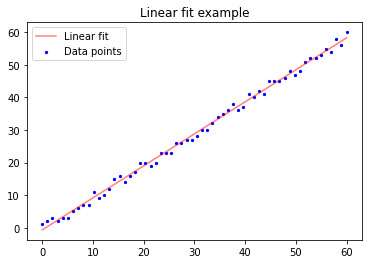

In [1]:
import numpy as np
from numpy import random  #it will be useful for generating some random noise (on purpose) in the data points that we want to fit
import matplotlib.pyplot as plt  #for plotting the data
#---LINEAR FIT----
#generate the x array
x = np.linspace(0,60,60) # generate an array of 60 equally space points
#generate the y array exploiting the random.randint() function to introduce some random noise
y = np.array([random.randint(i-2, i+2) for i in x]) #each element is a random number with value between +-2 the respective x axis value
#Applying a linear fit with .polyfit()
fit = np.polyfit(x,y,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept  #obtaining the y axis values for the fitting function
#Plotting the data
fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(x,y,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear fit example')
ax.legend()
plt.show()

As mentioned before, the variable fit will contain the fitting parameters. The first one is the angular coefficient, the last one the intercept. At this point, in order to plot our fit, we have to build the y-axis values from the obtained parameters, using the original x-axis values. In the example, this step is described by the definition of the fit_eq variable. The last remaining thing is to plot the data and the fitting equation. The result is:

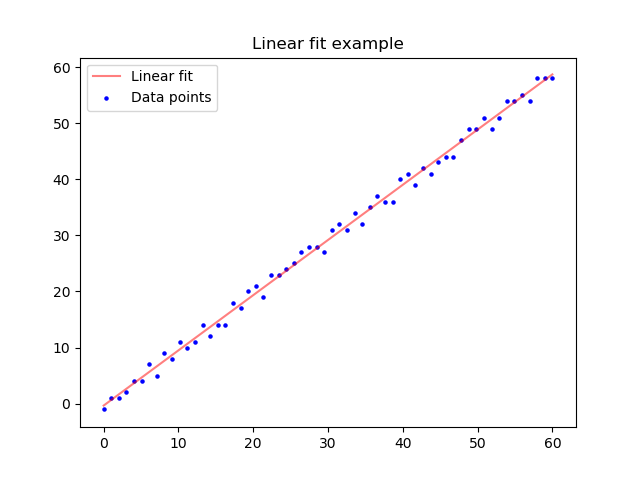

## Polynomial fit of second degree
In this second example, we will create a second-degree polynomial fit. The polynomial functions of this type describe a parabolic curve in the xy plane; their general equation is:

y = ax2 + bx + c

where a, b and c are the equation parameters that we estimate when generating a fitting function. The data points that we will fit in this example, represent the trajectory of an object that has been thrown from an unknown height. Exploiting the .polyfit() function, we will fit the trajectory of the falling object and we will also obtain an estimate for its initial speed in the x-direction, v0.

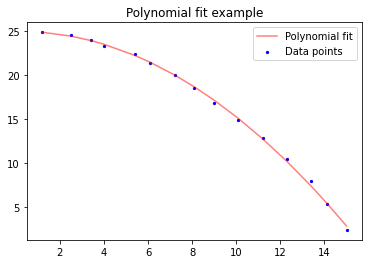

In [2]:
#-----POLYNOMIAL FIT----
x = np.array([1.2,2.5,3.4,4.0,5.4,6.1,7.2,8.1,9.0,10.1,11.2,12.3,13.4,14.1,15.0]) # x coordinates
y = np.array([24.8,24.5,24.0,23.3,22.4,21.3,20.0,18.5,16.8,14.9,12.8,10.5,8.0,5.3,2.4]) # y coordinates
fit = np.polyfit(x, y, 2)
a = fit[0]
b = fit[1]
c = fit[2]
fit_equation = a * np.square(x) + b * x + c
#Plotting
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x, fit_equation,color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x, y, s = 5, color = 'b', label = 'Data points')
ax1.set_title('Polynomial fit example')
ax1.legend()
plt.show()

Once initialized the x and y arrays defining the object trajectory, we apply the function .polyfit(), this time inserting “2” as degree of the polynomial fit function. This is because the trajectory of a falling object can be described by a second-degree polynomial; in our case the relation between the x and y coordinates is given by:

y = y0 – ½ (g/ v02)x2

where y0 is the initial position (the height from which the object has been thrown), g the acceleration of gravity (  ̴9.81 m/s2) and v0 the initial speed (m/s) in the x-direction (visit: https://en.wikipedia.org/wiki/Equations_for_a_falling_body for more details). We then assign at the variables a, b and c the value of the 3 fitting parameters and we define fit_equation, the polynomial equation that will be plotted; the result is:

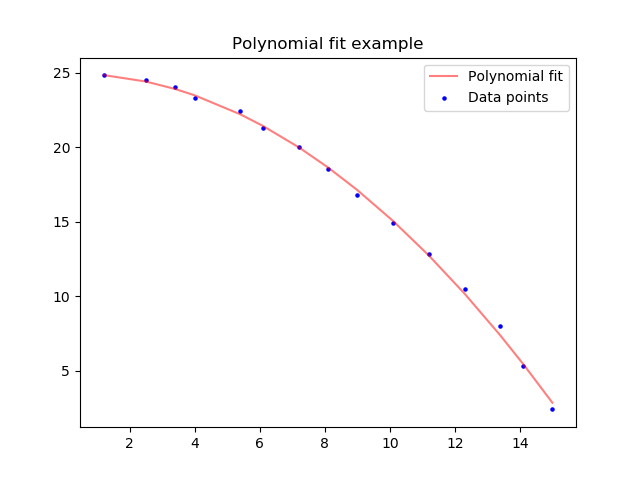

If we now print the three fitting parameters, a,b and c, we obtain the following values: a = -0.100 , b = 0.038, c = 24.92. In the equation describing the trajectory of a falling body there is no b term; since the fit is always an approximation of the real result, we will always get a value for all the parameters; however we shall notice that the value of our b term is much smaller than the others and can be somehow neglected, when comparing our fit with the equation describing the physics of the problem. The c term represents the initial height (y0) while the a term describes the quantity – ½ (g/ v02). Hence, the initial velocity v0 is given by:

v0=2-g2a

Yielding the final value of v0 = 6.979 m/s.